In [1]:
import numpy as np
import os
import geopandas as gpd
import pandas as pd
from scipy import stats as scipy_stats
import scipy.signal
import rasterio
import rasterio.features
from rasterio import MemoryFile
from affine import Affine
from rasterio.plot import show
from rasterio.plot import show_hist
import matplotlib.pyplot as plt
import rasterstats
from scipy.ndimage import gaussian_filter
from shapely.geometry import Polygon, shape, MultiPolygon, Point, MultiPoint
import shapely
import subprocess as sp

# Import libs
import sys
module_path = os.path.abspath(os.path.join('..', 'libs'))
if module_path not in sys.path:
    sys.path.append(module_path)
from s3utils import *

/Users/colinbrust/projects/rooftop-index/venv/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
S3R = S3Helper('roof-index')

# Read necessary_data
flat = S3R.read_shp_from_s3_as_gpd("missoula/geospatial/contiguous_flat.zip").to_crs(6514)

In [3]:
min_x, min_y, max_x, max_y = flat.total_bounds

def make_random_pts(min_x, min_y, max_x, max_y, n_samples=10):
    
    out = []
    for n in range(n_samples):
        x = np.random.uniform(min_x, max_x)
        y = np.random.uniform(min_y, max_y)
        out.append(Point(x, y))
    
    return MultiPoint(out)

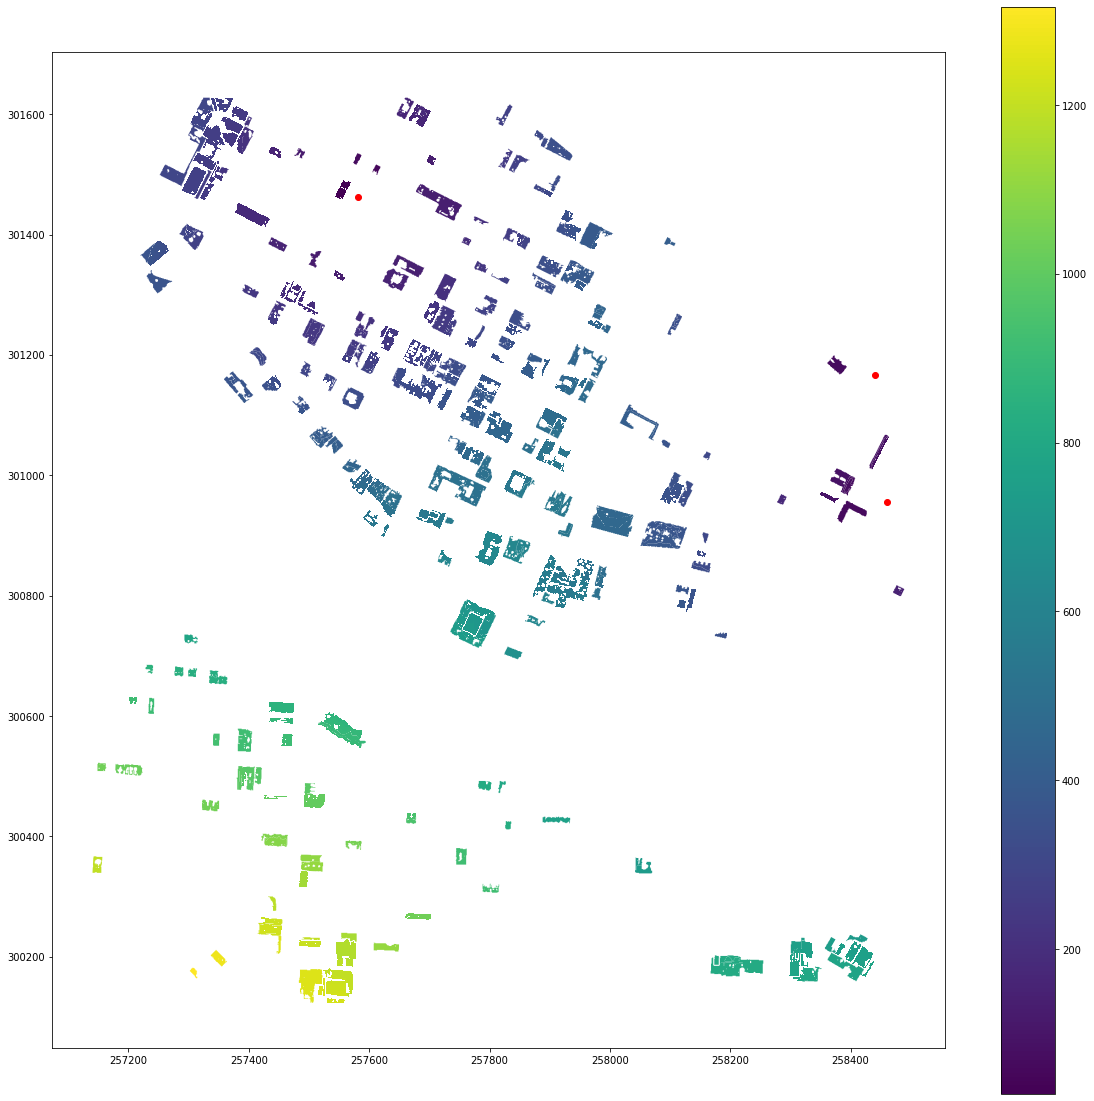

In [38]:
num_pts=3

pts = make_random_pts(min_x, min_y, max_x, max_y, num_pts)

def calc_distances(shp, pts):
    flat['centers'] = flat.centroid
    flat['distances'] = flat['centers'].apply(lambda x: {i: x.distance(y) for i, y in enumerate(pts)})
    
    return flat

def calc_closest(shp, pts):
    flat['centers'] = flat.centroid
    flat['proximity'] = flat['centers'].apply(lambda x: min([x.distance(y) for y in pts]))
    
    return flat

new = calc_closest(flat, pts)
arr = np.array([x.xy for x in list(pts)]).squeeze()
x = arr[:, 0]
y = arr[:, 1]

fig, ax = plt.subplots(1,1, figsize=(20,20))
new.plot(column='proximity', legend=True, ax=ax)
plt.scatter(x, y, color='red')